In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [6]:
@staticmethod
def factor(df, period=20):
    '''Chaikin资金流：结合价格和成交量的资金流向指标'''
    # 计算资金流乘数
    money_flow_multiplier = ((df['close'] - df['low']) - (df['high'] - df['close'])) / (df['high'] - df['low'])
    money_flow_multiplier = money_flow_multiplier.replace([np.inf, -np.inf], 0).fillna(0)
    
    # 计算资金流量
    money_flow_volume = money_flow_multiplier * df['volume']
    
    # 计算CMF
    cmf = money_flow_volume.rolling(period).sum() / df['volume'].rolling(period).sum()
    return cmf

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): -0.004583
   Rank_IC (Spearman): -0.019229
📊 信息比率:
   IR: 0.036490
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 131016
   因子列: factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


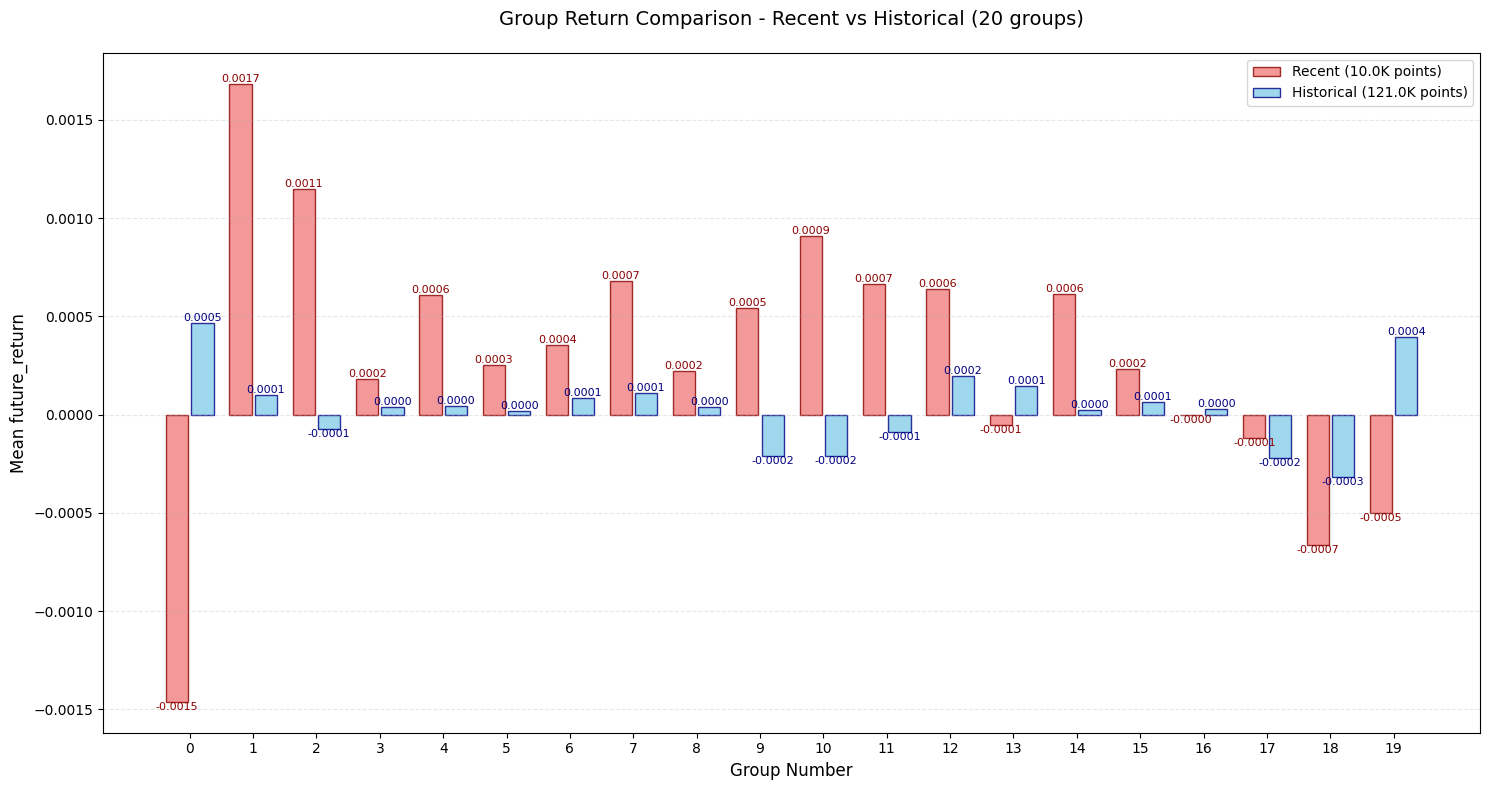

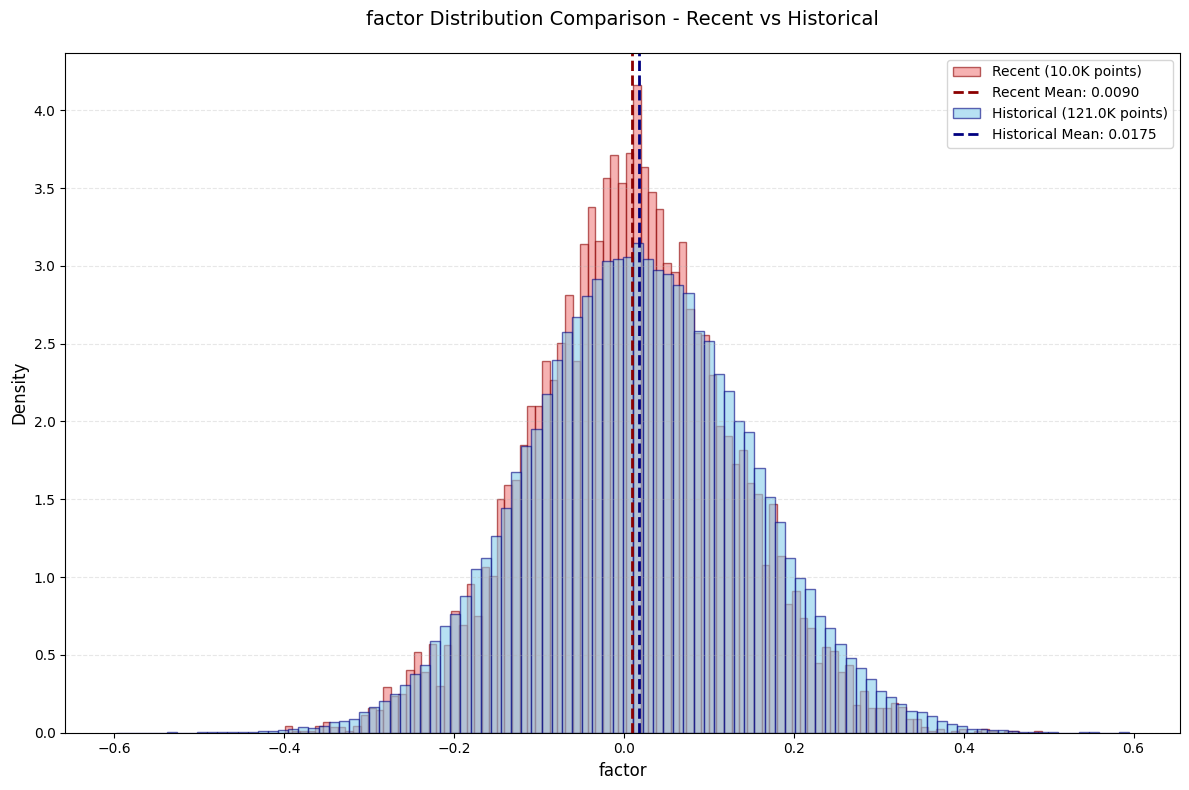

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [7]:
evaluator.set_factor(
    factor_func=factor,
    factor_name='factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

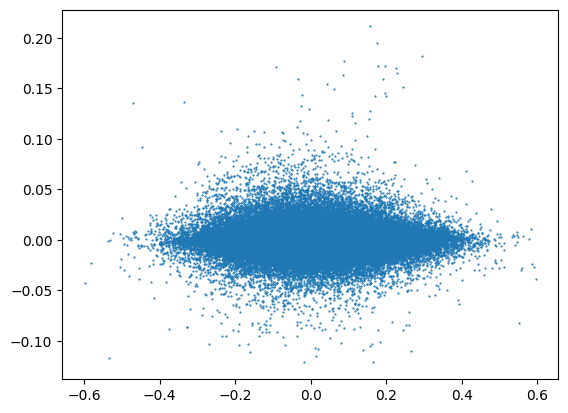

In [8]:
import matplotlib.pyplot as plt
plt.scatter(factor(df),df['close'].pct_change(-10), s=0.3)

In [9]:
result['information_ratio']['group_correlations']
# 这表示不同分组之间的相关性，通常用于评估因子在不同市场状态下的表现一致性。
# 如果相关性较高，说明因子在不同市场状态下表现一致；如果相关性较低，说明因子在不同市场状态下表现差异较大。

[-0.016802958876859918,
 -0.00045484264515466754,
 0.002438765797761683,
 0.002364732675198822,
 -0.009546623239282107,
 -0.0011115238684610642,
 0.009303365078404464,
 0.004905452338160981,
 -0.0243796166036809,
 0.0391943271865949]

In [10]:
print(result)

{'correlation_analysis': {'IC': -0.004582566470136568, 'Rank_IC': -0.01922910164998947}, 'information_ratio': {'IR': 0.03648992629155047, 'group_correlations': [-0.016802958876859918, -0.00045484264515466754, 0.002438765797761683, 0.002364732675198822, -0.009546623239282107, -0.0011115238684610642, 0.009303365078404464, 0.004905452338160981, -0.0243796166036809, 0.0391943271865949], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0      -0.5982  -0.1942   -0.2478       0.0003      0.0143   6551
1      -0.1942  -0.1467   -0.1685       0.0002      0.0129   6551
2      -0.1467  -0.1152   -0.1301       0.0000      0.0131   6551
3      -0.1152  -0.0901   -0.1024       0.0001      0.0123   6551
4      -0.0901  -0.0692   -0.0794       0.0001      0.0122   6550
5      -0.0692  -0.0503   -0.0597       0.0000      0.0121   6551
6      -0.0502  -0.0327   -0.0415  